<a href="https://colab.research.google.com/github/junting-huang/data_storytelling/blob/main/case_6_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# space
- how do we examine the spatial relationship?

## case 6.1 worlding
- text processing
- word cloud
- environment

## exercise 6.1
replace the keyword to find sentences for a different narrative

## case 6.2 mapping
- named entity recognition
- disambiguation
- geo-coding
- mapping

## exercise 6.1
replace the corpus to create another map


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


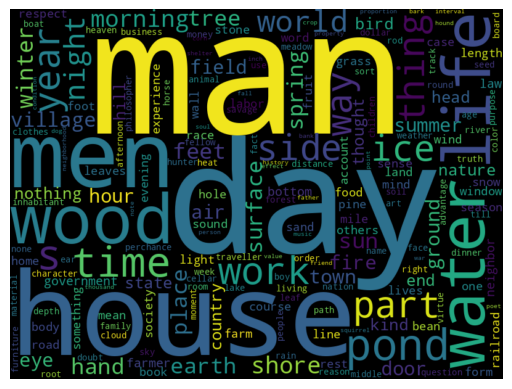

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure nltk's wordnet and averaged_perceptron_tagger are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

def create_word_cloud(text):
    # Tokenize the text
    tokenized_text = word_tokenize(text)

    # POS tagging
    tagged_words = nltk.pos_tag(tokenized_text)

    # Only keep nouns (NN and NNS tags according to nltk's pos_tag)
    nouns = [word for word, pos in tagged_words if (pos == 'NN' or pos == 'NNS')]

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=600, margin=0).generate(' '.join(nouns))

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

# Read text from a file
with open('walden.txt', 'r') as f:
    text = f.read()

create_word_cloud(text)

In [4]:
import re

sound_descriptions = []

with open('walden.txt', 'r') as file:
    for line in file:
        if re.search(r'\bice\b', line, re.I):  # search for "sound" as a whole word, ignore case
            sound_descriptions.append(line.strip())

# print the lines where "sound" is found
for description in sound_descriptions:
    print(description)

I have always endeavored to acquire strict business habits; they are indispensable to every man. If your trade is with the Celestial Empire, then some small counting house on the coast, in some Salem harbor, will be fixture enough. You will export such articles as the country affords, purely native products, much ice and pine timber and a little granite, always in native bottoms. These will be good ventures. To oversee all the details yourself in person; to be at once pilot and captain, and owner and underwriter; to buy and sell and keep the accounts; to read every letter received, and write or read every letter sent; to superintend the discharge of imports night and day; to be upon many parts of the coast almost at the same time;—often the richest freight will be discharged upon a Jersey shore;—to be your own telegraph, unweariedly sweeping the horizon, speaking all passing vessels bound coastwise; to keep up a steady despatch of commodities, for the supply of such a distant and exorb

In [5]:
import spacy

place_names = []

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# Read the text from a .txt file
with open('walden.txt', 'r') as file:
    text = file.read()

# process the text
doc = nlp(text)

# Extract named entities
for entity in doc.ents:
    # Check if the entity is a location
    if entity.label_ == "GPE":
        place_names.append(entity.text)

In [6]:
place_names = list(set(place_names))
place_names = [item for item in place_names if item.isalpha()]
print(place_names)

['Turkey', 'Maine', 'Nutting', 'Food', 'Boston', 'Aldebaran', 'Russia', 'Granada', 'Nebuchadnezzar', 'Cromwell', 'Zanzibar', 'Bedford', 'Kabir', 'Louisiana', 'Britain', 'Nature', 'Charleston', 'Arrivéd', 'Memnon', 'oxen', 'Tremont', 'Sacontala', 'snarl', 'Frobisher', 'Bombay', 'Farinam', 'Newfoundland', 'drifts', 'Achilles', 'Hirundo', 'Polk', 'Columbus', 'Arcadia', 'Mexico', 'Walden', 'Iolas', 'Egypt', 'Massachusetts', 'Paphlagonian', 'Fitchburg', 'Cuttingsville', 'Chaos', 'Clarke', 'Acton', 'Georgia', 'Gulistan', 'Kirby', 'Madras', 'Liebig', 'Brahma', 'China', 'Massasoit', 'California', 'Atropos', 'La', 'us', 'Clothing', 'vinariam', 'Neva', 'Kohinoor', 'Asiatic', 'Seville', 'Portugal', 'Tell', 'Hanno', 'Theseus', 'Iceland', 'Colorado', 'Weston', 'Paris', 'Jersey', 'Newton', 'Connecticut', 'Sweden', 'Iliad', 'Vishnu', 'Troy', 'Sephronia', 'hoorer', 'Khoung', 'Vermont', 'Brister', 'Baffin', 'Bonaparte', 'Bacon', 'Palestine', 'Flint', 'Dresden', 'Philadelphia', 'India', 'Wayland', 'Sudb

In [7]:
import folium
from geopy.geocoders import Nominatim

# Create a Folium map object
map = folium.Map(location=[40.712776, -74.005974], zoom_start=10)

# Geocode the place names
geolocator = Nominatim(user_agent="my_map")
locations = []
for place in place_names:
    location = geolocator.geocode(place)
    if location:
        locations.append((place, location.latitude, location.longitude))

# Add markers for each place on the map
for place, lat, lon in locations:
    folium.Marker(location=[lat, lon], popup=place).add_to(map)

# Save the map to an HTML file
map.save("map.html")

map